# Lecture 7 assignment

so in batch_norm layer the last parameter(channel in our case) of the shape is multiplyed by four,

parameters after batch_norm = last parameter(channel in our case) of the shape of previous layer * 4

but why?

for each feature (in our case channel) in the input data batch_norm introduces four parameters

1. gamma (scaling param)
2. beta (shifting param)
3. mov_mean (running mean(non-trainable))
4. mov_var (running variance(non-trainable))

non-trainable parameters are used during inference (testing) to normalize the input data

so, the number of total parameters = 4 * n;
where n = number of features (in our case channel)

<b> Assignment q2) Activation softmax why at the classification layer? </b>

softmax is a mathematicl function that converts a vector of numbers into a vector of probabilities, if we configure our network to output N values, one for each class in the classification task, the softmax function is used to normalize the outputs, converting them from weighted sum values into probabilities that sum to one. each value in the output of the softmax function is indicates the probability of membership for each class.
That's why we use softmax activation in the classification

# **Assignment 3 lecture-8**

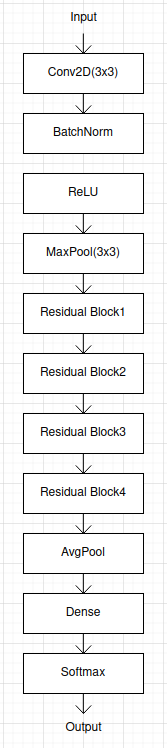

In [ ]:

import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
import tqdm, time

import glob
import random,time

import math

from functools import partial

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import *

In [15]:
def res_block(in_tensor, n_fiter, s_krnl, do_norm=True):
  in_tensor_0 = Conv2D(n_filter, kernel_size=(1, 1), padding='same', activation='relu')(in_tensor)

  ftr1 = Conv2D(n_filter, kernel_size=(s_krnl, s_krnl), padding='same', activation='relu')(in_tensor_0)
  ftr2 = Conv2D(n_filter, kernel_size=(s_krnl, s_krnl), padding='same', activation='relu')(ftr1)
  ftr3 = Conv2D(n_filter, kernel_size=(s_krnl, s_krnl), padding='same', activation='relu')(ftr2)
  residual_output = add([ftr3, in_tensor_0])

  if do_norm:
    residual_output = BatchNormalization()(residual_output)

  return residual_output

In [33]:
from keras.src.layers.pooling.average_pooling2d import AveragePooling2D
inp_dim = 224
n_channel = 3
n_classes = 10

n_filter = 64
s_krnl = 3
dropout = 0.3

inputs = Input(shape=(inp_dim, inp_dim, n_channel))

n_filter_col = [n_filter, n_filter*2, n_filter*4, n_filter*8]


y = Conv2D(n_filter, kernel_size=(s_krnl, s_krnl), padding='same')(inputs)
y = BatchNormalization()(y)
y = Activation('relu')(y)
y = MaxPooling2D()(y)


for i in range(len(n_filter_col)):
  y = res_block(y, n_filter_col[i], s_krnl, do_norm=True)


y = AveragePooling2D(s_krnl, s_krnl)(y)
y = Flatten()(y)
outputs = Dense(n_classes, activation='softmax')(y)


model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_284 (Conv2D)         (None, 224, 224, 64)         1792      ['input_25[0][0]']            
                                                                                                  
 batch_normalization_84 (Ba  (None, 224, 224, 64)         256       ['conv2d_284[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_17 (Activation)  (None, 224, 224, 64)         0         ['batch_normalization_8

In [ ]:
x = Input(shape=(1))
y = tf.square(x)  # This op will be treated like a layer
y = BatchNormalization()(y)
model = Model(x, y)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 tf.math.square (TFOpLambda  (None, 1)                 0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1)                 4         
 Normalization)                                                  
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 2 (8.00 Byte)
_________________________________________________________________


In [ ]:
x = Input(shape=(1,3))
y = tf.square(x)  # This op will be treated like a layer
y = BatchNormalization()(y)
model = Model(x, y)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 3)]            0         
                                                                 
 tf.math.square_1 (TFOpLamb  (None, 1, 3)              0         
 da)                                                             
                                                                 
 batch_normalization_1 (Bat  (None, 1, 3)              12        
 chNormalization)                                                
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 6 (24.00 Byte)
_________________________________________________________________


In [ ]:
x = Input(batch_size = 3, shape=(1))
y = tf.square(x)  # This op will be treated like a layer
y = BatchNormalization()(y)
model = Model(x, y)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(3, 1)]                  0         
                                                                 
 tf.math.square_2 (TFOpLamb  (3, 1)                    0         
 da)                                                             
                                                                 
 batch_normalization_2 (Bat  (3, 1)                    4         
 chNormalization)                                                
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 2 (8.00 Byte)
_________________________________________________________________


In [ ]:
# num_parameters =  (krnl*krnl)*channel*filter + bias

filters1= 2
filters2= 8
filters3= 12
krnl= 2
dropout = 0.3

dimn = 224

inputs = Input(shape=(dimn, dimn, 3))


y1 = Conv2D(filters=filters1,kernel_size=(krnl, krnl), activation='relu', padding='same', kernel_initializer='he_normal', use_bias = True)(inputs)

y2 = Conv2D(filters=filters2 ,kernel_size=(krnl, krnl), activation='relu', padding='same', kernel_initializer='he_normal', use_bias =True)(y1)

y = Conv2D(filters=filters3 ,kernel_size=(krnl, krnl), activation='relu', padding='same', kernel_initializer='he_normal')(y2)

# y = BatchNormalization()(y)


outputs = y
model = Model(inputs=inputs, outputs=outputs)

model.summary()


# Assignment 3

# q1) Explain the parameter count in the batchnorm layer



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 2)       26        
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 8)       72        
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 12)      396       
                                                                 
Total params: 494 (1.93 KB)
Trainable params: 494 (1.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weights = model.get_weights()
print('layers', len( weights))



layers 6


In [ ]:
np.array( weights[1])

array([0., 0.], dtype=float32)

In [ ]:
np.array( weights[0])

array([[[[ 0.02653238, -0.23867287],
         [-0.06905353,  0.2525611 ],
         [ 0.33297357, -0.8157547 ]],

        [[ 0.02803571, -0.5613288 ],
         [ 0.3629716 , -0.44227812],
         [ 0.3272011 , -0.48695746]]],


       [[[ 0.01982059,  0.35831353],
         [ 0.23196746, -0.75176305],
         [ 0.46096957,  0.25131428]],

        [[ 0.7076463 , -0.6148178 ],
         [ 0.15420197, -0.57862866],
         [-0.3468531 , -0.05197895]]]], dtype=float32)

In [ ]:
np.array( weights[0]).shape

(2, 2, 3, 2)

In [ ]:
#print('shapes',weights[0].shape, weights[1].shape,weights[2].shape, weights[3].shape)



**Check your basic operations**

In [ ]:

# Basic algebric operation



filters1= 3
filters2= 32
kernel_size=3
dropout = 0.3

operation = 2


dimn = 224
inputs = Input(shape=(dimn, dimn, 3))
y = Conv2D(filters=filters1,kernel_size=kernel_size, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)

y1 = Conv2D(filters=filters2 ,kernel_size=kernel_size, activation='relu', padding='same', kernel_initializer='he_normal')(y)

y2 = Conv2D(filters=filters2 ,kernel_size=kernel_size, activation='relu', padding='same', kernel_initializer='he_normal')(y)

if operation==1:
  y = add([y1,y2])

elif operation==2:
  y = subtract([y1,y2])

else:
  y = multiply([y1,y2])


#y = MaxPooling2D(8,8)(y)
#y = GlobalAvgPool2D()(y)
outputs = y
model = Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 224, 224, 3)          84        ['input_5[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 224, 224, 32)         896       ['conv2d_3[0][0]']            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 224, 224, 32)         896       ['conv2d_3[0][0]']            
                                                                                            

**Basic Classfier**

In [ ]:
filters=64
kernel_size=3
dropout = 0.3

inputs = Input(shape=(32, 32, 3))

y = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
y = MaxPooling2D()(y)


y = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y = MaxPooling2D()(y)



y = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y = MaxPooling2D()(y)



y = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)

y = Flatten()(y)

y = Dropout(dropout)(y)
outputs = Dense(10, activation='softmax')(y)


model = Model(inputs=inputs, outputs=outputs)

model.summary()

# Assignment q2) Activation softmax why at the classification layer?

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          3692